# Kr analysis (run 4119)

# Notebook configuration

In [1]:
outputfolder  = "plots/"
save_plots    = False
inputfilename = "/Users/Gonzalo/github/NEXTdata/Bkg/dst_4119.root.h5"

In [2]:
import os
import functools
import textwrap
import time
import glob
print("Running on ", time.asctime())

import numpy             as np
import matplotlib.pyplot as plt

import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf
import invisible_cities.reco.dst_functions  as dstf

pi = np.pi

coref = fitf

Running on  Sun May 28 00:27:42 2017


#### General plotting options

In [3]:
%matplotlib inline

plt.rcParams["figure.figsize"]          = 8, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"
XR1Opt  = "k"
XR2Opt  = "c"
KrOpt   = "m"
if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

#### Useful functions

In [4]:
def labels(xlabel, ylabel):
    """
    Set x and y labels.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist(*args, **kwargs)


def doublehist(data1, data2, lbls, *args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    h1 = plt.hist(data1, *args, label=lbls[0], alpha=0.5, normed=True, **kwargs)
    h2 = plt.hist(data2, *args, label=lbls[1], alpha=0.5, normed=True, **kwargs)
    return h1, h2, plt.legend()

    
def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist2d(*args, **kwargs)

    
def pdf(data, *args, **kwargs):
    """
    Create a normalized histogram with appropiate range.
    """
    data = np.array(data)
    h = hist(data, *args, **kwargs, weights=np.ones_like(data)/len(data))
    plt.yscale("log")
    plt.ylim(1e-4, 1.)
    return h
    
def scatter(*args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    return plt.scatter(*args, **kwargs)


def profile_and_scatter(x, y, z, nbin, xrange, yrange, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    x, y, z, ze = fitf.profileXY(x, y, z, *nbin, xrange, yrange, *args, **kwargs)
    x_ = np.repeat(x, x.size)
    y_ = np.tile  (y, y.size)
    z_ = z.flatten()
    return (x, y, z, ze), plt.hist2d(x_, y_, nbin, (xrange, yrange), weights=z_), plt.colorbar()


def doublescatter(x1, y1, x2, y2, lbls, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    sc1 = plt.scatter(x1, y1, *args, label=lbls[0], **kwargs)
    sc2 = plt.scatter(x2, y2, *args, label=lbls[1], **kwargs)
    return sc1, sc2, plt.legend()

def covariance(x, y):
    cov = np.cov(x, y)
    l, v = np.linalg.eig(cov)
    lx, ly = l**0.5
    vx, vy = v.T
    x0, y0 = np.mean(x), np.mean(y)
    x1     = lx * vx[0]
    y1     = lx * vx[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*ly, head_length=0.1*lx, fc='r', ec='r')
    x1     = ly * vy[0]
    y1     = ly * vy[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*lx, head_length=0.1*ly, fc='r', ec='r')
    return l, v

def reso(values, ene=29.6):
    _, mu, sigma = values
    r = 235. * sigma/mu
    return r, r * (ene/2458)**0.5

def gausstext(values, ene=29.6):
    return textwrap.dedent("""
        $\mu$ = {:.1f}
        $\sigma$ = {:.2f}
        R = {:.3}%
        Rbb = {:.3}%""".format(*values[1:], *reso(values, ene)))

def save_to_folder(save_plots, outputfolder, name):
    """
    Set title and save plot in folder.
    """
    plt.title(name)
    if save_plots:
        plt.savefig("{}/{}.png".format(outputfolder, name), dpi=100)

save = functools.partial(save_to_folder, save_plots, outputfolder)

### Input data

In [5]:
ifile = os.path.expandvars(inputfilename)
print("ifile:", ifile)

ifile: /Users/Gonzalo/github/NEXTdata/Bkg/dst_4119.root.h5


# Read data

In [6]:
full = dstf.load_dst(ifile, "DST", "Events")
full = full[full.R<200]
print(len(full))
full.head()

54883


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,3,1.495903e+09,0,1,350.0,1.618151,12.958491,314325.0,16.318500,1689.518311,...,653462.5,1,339.1375,339.1375,25.000000,-115.000000,117.686023,-1.356736,0.000000,0.000000
1,5,1.495903e+09,0,1,150.0,0.901286,5.009254,301700.0,8.154125,1546.299072,...,653462.5,6,351.7625,351.7625,-9.350229,34.376698,35.625611,1.836365,4.972373,6.595931
2,7,1.495903e+09,0,1,175.0,2.057942,11.347491,508625.0,9.483313,2764.263672,...,653462.5,7,144.8375,144.8375,-111.262949,-30.806765,115.449125,-2.871477,6.498543,5.742160
3,14,1.495903e+09,0,1,225.0,1.601644,9.088663,503450.0,12.554063,2119.338135,...,655462.5,8,152.0125,152.0125,60.542495,-86.929927,105.934913,-0.962456,6.649207,6.520608
4,16,1.495903e+09,0,1,225.0,1.522247,12.603689,365825.0,15.121875,1415.147705,...,652462.5,7,286.6375,286.6375,-165.789371,-83.401139,185.585197,-2.675504,6.970087,7.422085


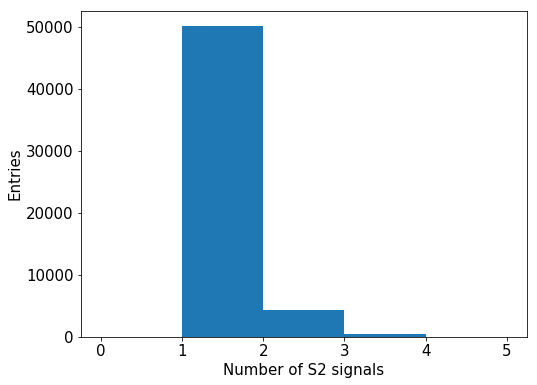

In [7]:
hist(full.nS2, 5, (0,5))
labels("Number of S2 signals", "Entries")

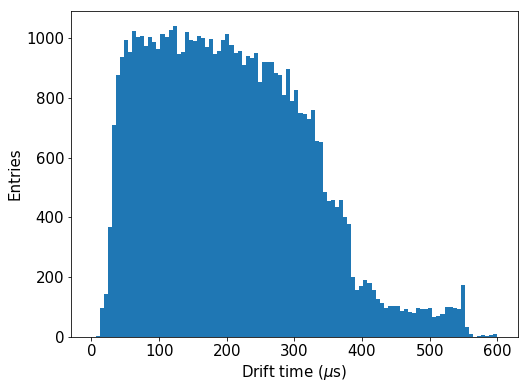

In [8]:
hist(full.Z, 100, (0,600))
labels("Drift time ($\mu$s)", "Entries")

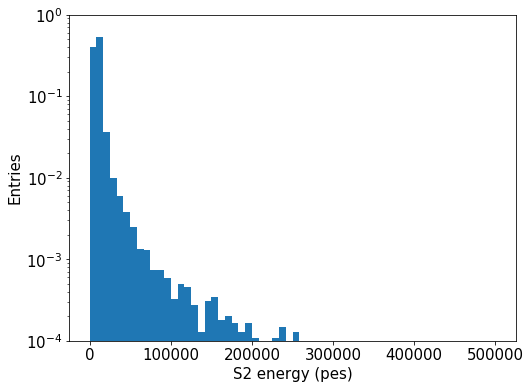

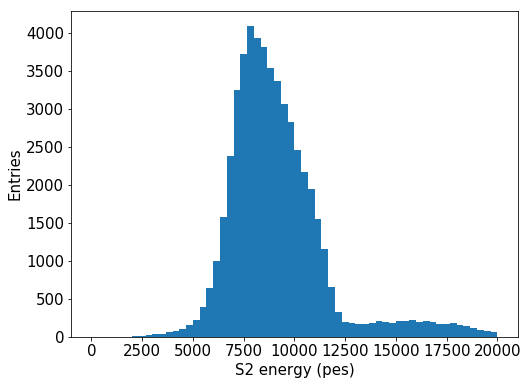

In [10]:
pdf(full.S2e, 60, (0,500e3))
labels("S2 energy (pes)", "Entries")

hist(full.S2e, 60, (0,20e3))
labels("S2 energy (pes)", "Entries")

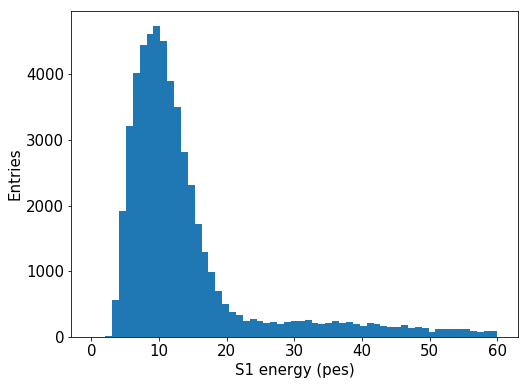

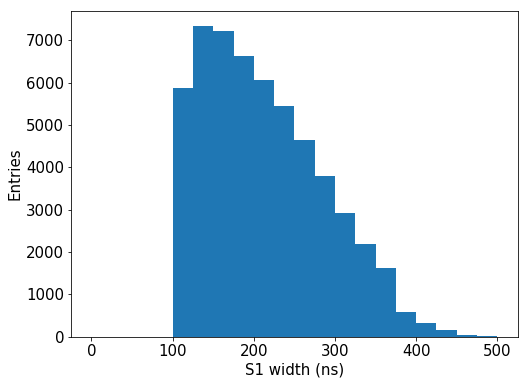

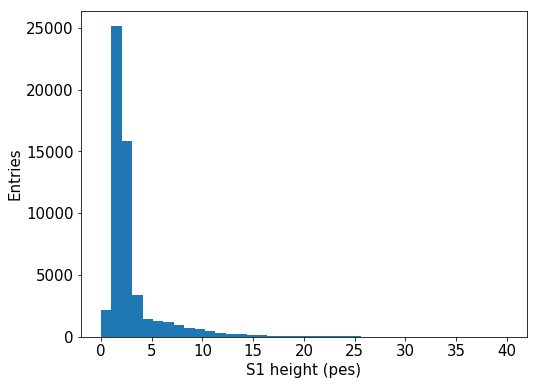

In [11]:
bins = np.linspace(0, 60, 60)
hist(full.S1e, bins)
labels("S1 energy (pes)", "Entries")

bins = np.linspace(0, 500, 21)
hist(full.S1w, bins)
labels("S1 width (ns)", "Entries")

bins = np.linspace(0, 40, 40)
hist(full.S1h, bins)
labels("S1 height (pes)", "Entries")

# S2 energy vs Z

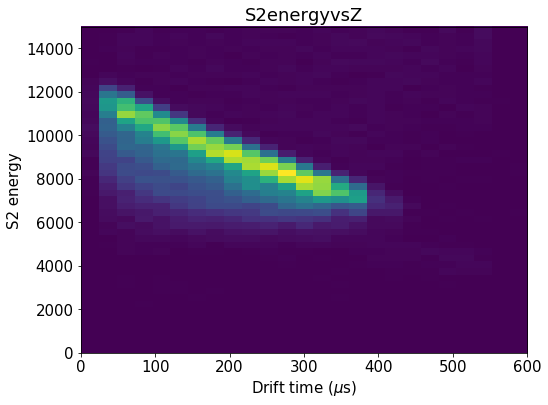

In [15]:
zrange = 0, 600
Erange = 0, 15e3
hist2d(full.Z, full.S2e, (25,  50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ")

# S1 energy

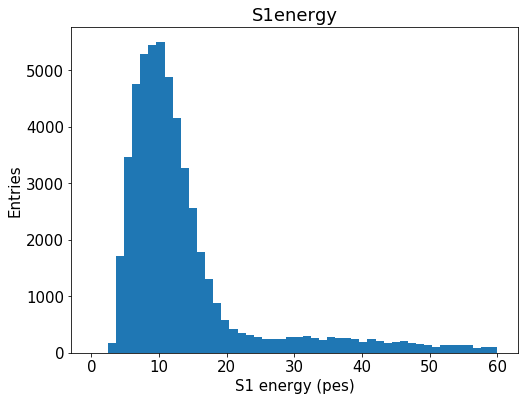

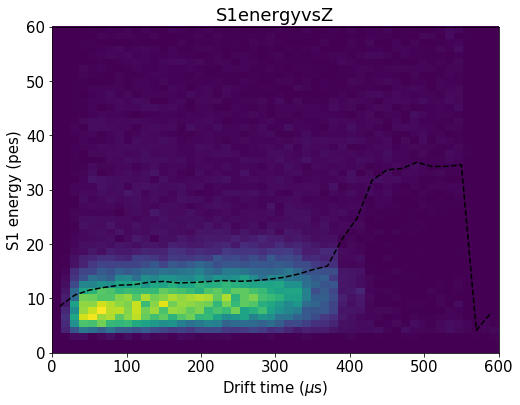

In [16]:
zrange = 0, 600
Srange = 0, 60

hist(full.S1e, 50, range=Srange)
labels("S1 energy (pes)", "Entries")
save("S1energy")

hist2d(full.Z, full.S1e, (50, 50), range=(zrange, Srange))
x, y, _ = fitf.profileX(full.Z, full.S1e, 30, xrange=zrange, yrange=Srange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1energyvsZ")

# S1 width

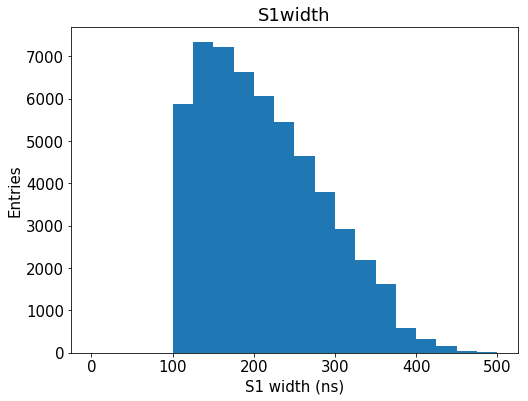

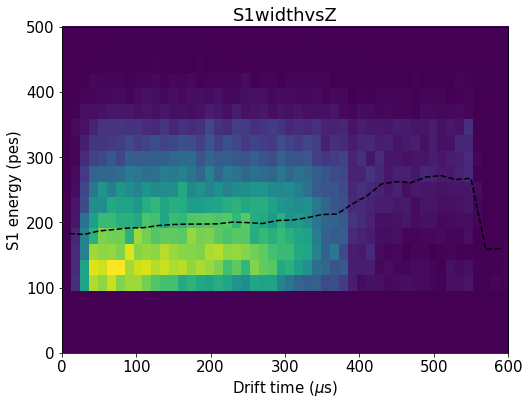

In [17]:
zrange = 0, 600
wrange = 0, 500

hist(full.S1w, np.linspace(*wrange, 21))
labels("S1 width (ns)", "Entries")
save("S1width")

hist2d(full.Z, full.S1w, (50, 21), range=(zrange, wrange))
x, y, _ = fitf.profileX(full.Z, full.S1w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1widthvsZ")

# S1 height

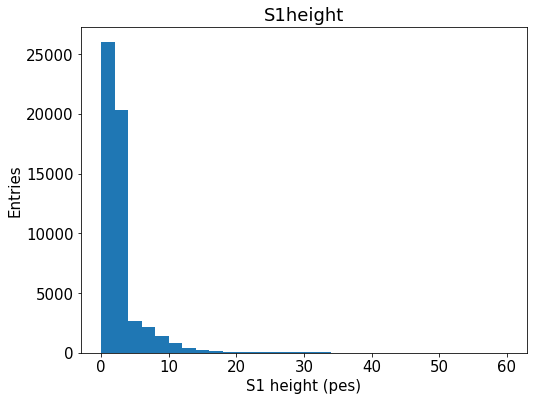

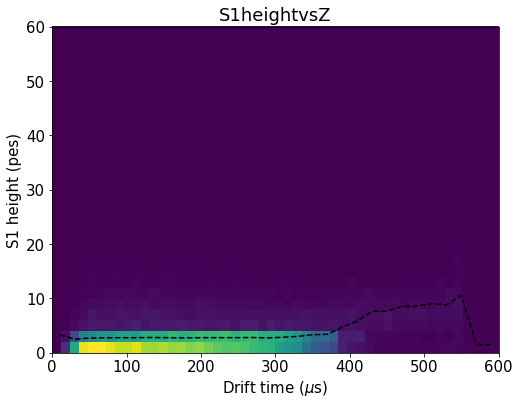

In [18]:
zrange = 0, 600
hrange = 0, 60

hist(full.S1h, 30, range=hrange)
labels("S1 height (pes)", "Entries")
save("S1height")

hist2d(full.Z, full.S1h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(full.Z, full.S1h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 height (pes)")
save("S1heightvsZ")

# S1 peak to area ratio

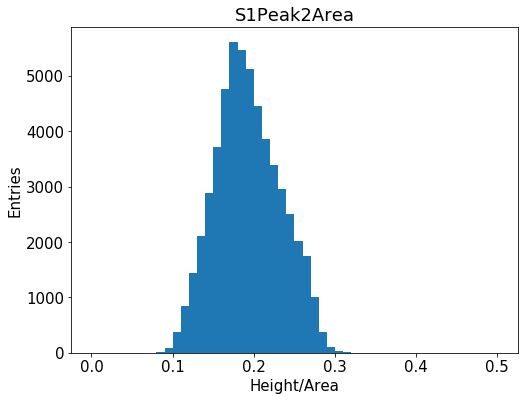

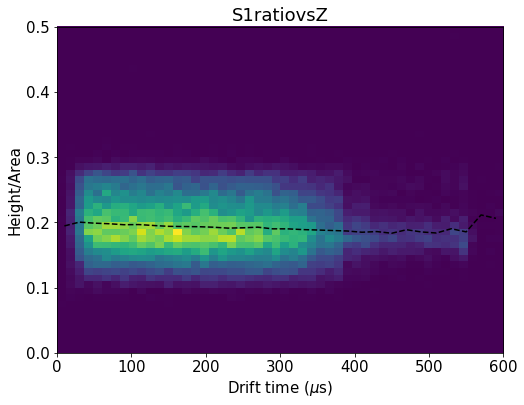

In [19]:
zrange = 0, 600
rrange = 0, 0.5

S1r = full.S1h/full.S1e
hist(S1r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S1Peak2Area")

hist2d(full.Z, S1r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(full.Z, S1r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S1ratiovsZ")

# S2 energy

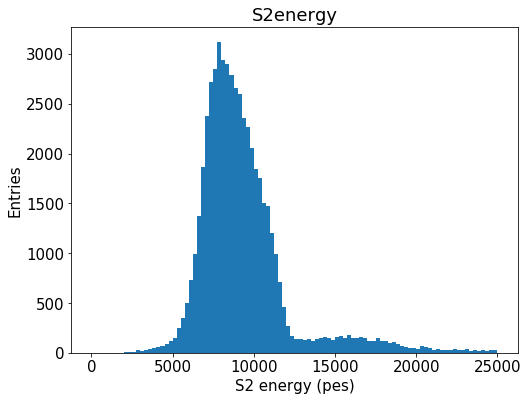

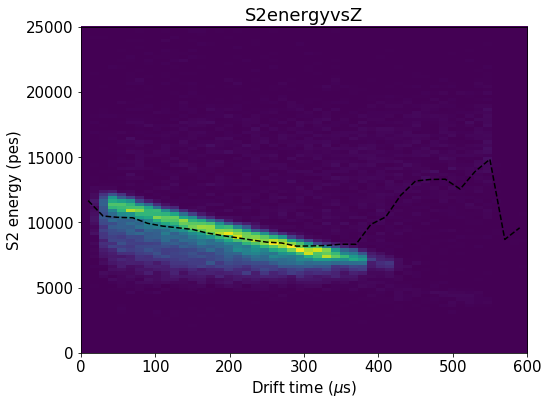

In [20]:
zrange = 0, 600
Erange = 0, 25e3

hist(full.S2e, 100, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy")

hist2d(full.Z, full.S2e, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(full.Z, full.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ")

# S2 width

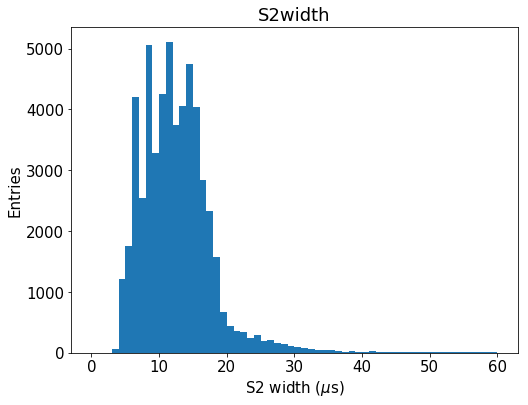

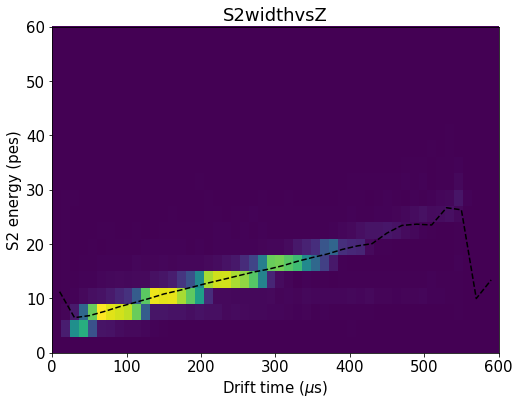

In [21]:
zrange = 0, 600
wrange = 0, 60

hist(full.S2w, 60, range=wrange)
labels("S2 width ($\mu$s)", "Entries")
save("S2width")

hist2d(full.Z, full.S2w, (50, 20), range=(zrange, wrange))
x, y, _ = fitf.profileX(full.Z, full.S2w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2widthvsZ")

# S2 height

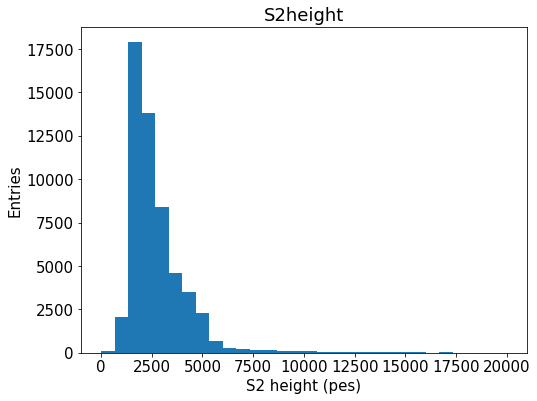

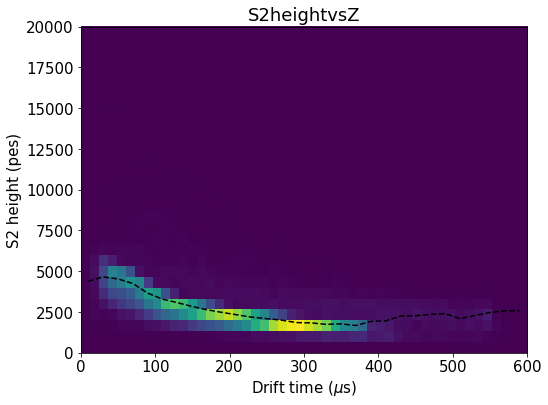

In [22]:
zrange = 0, 600
hrange = 0, 20e3

hist(full.S2h, 30, range=hrange)
labels("S2 height (pes)", "Entries")
save("S2height")

hist2d(full.Z, full.S2h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(full.Z, full.S2h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 height (pes)")
save("S2heightvsZ")

# S2 peak to area ratio

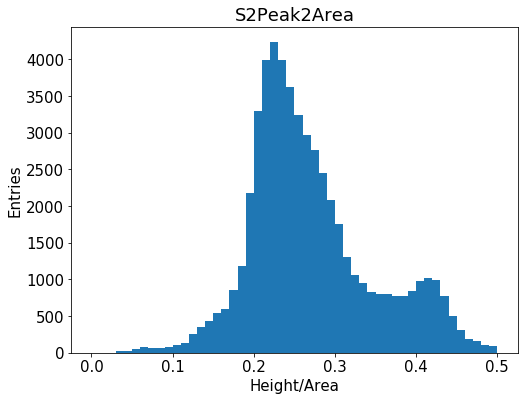

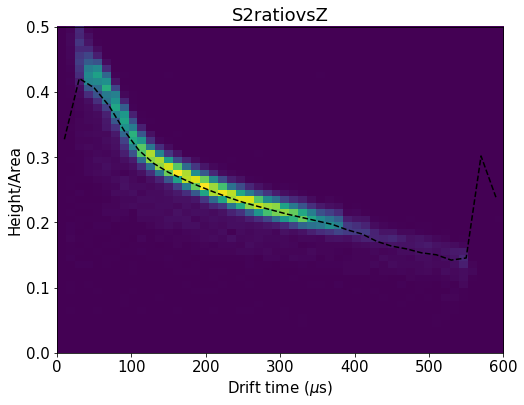

In [24]:
zrange = 0, 600
rrange = 0, 0.5

S2r = full.S2h/full.S2e

hist(S2r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S2Peak2Area")

hist2d(full.Z, S2r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(full.Z, S2r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S2ratiovsZ")

# S2 vs S1

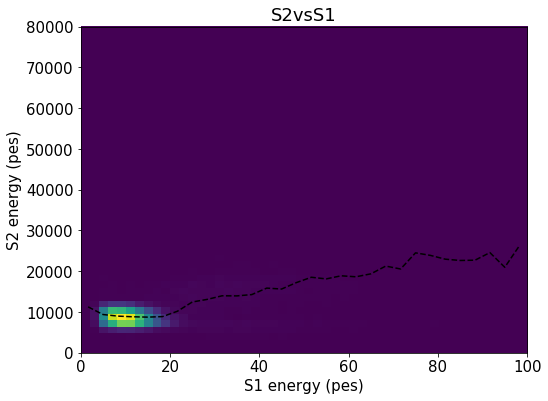

In [25]:
Srange = 0, 100
Erange = 0, 80e3

S = full.S1e
E = full.S2e

hist2d(S, E, (50, 50), range=(Srange, Erange))
x, y, _ = fitf.profileX(S, E, 30, xrange=Srange, yrange=Erange)
plt.plot(x, y, profOpt)

sel = fitf.in_range(S, *Srange) & coref.in_range(E, *Erange)
#c = covariance(S[sel], E[sel])
#print(*c)
labels("S1 energy (pes)", "S2 energy (pes)")
save("S2vsS1")

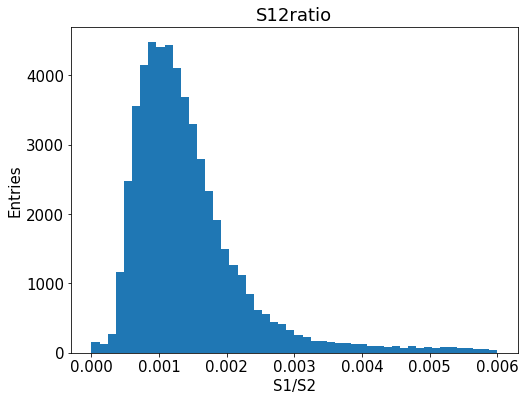

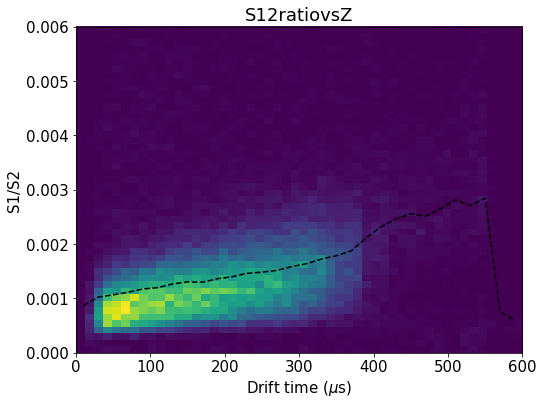

In [26]:
zrange = 0, 600
Rrange = 0, 0.006

S12r = full.S1e/full.S2e

hist(S12r, 50, range=Rrange)
labels("S1/S2", "Entries")
save("S12ratio")

hist2d(full.Z, S12r, (50, 50), range=(zrange, Rrange))
x, y, _ = fitf.profileX(full.Z, S12r, 30, xrange=zrange, yrange=Rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1/S2")
save("S12ratiovsZ")

# Temporary fiducialization

In [27]:
fid = full
fid = fid[fid.R < 100]
print("Ratio:", len(fid)/len(full))
fid.head()

Ratio: 0.2529380682542864


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
1,5,1.495903e+09,0,1,150.0,0.901286,5.009254,301700.0,8.154125,1546.299072,...,653462.5,6,351.7625,351.7625,-9.350229,34.376698,35.625611,1.836365,4.972373,6.595931
5,17,1.495903e+09,0,1,200.0,1.536415,9.303292,355100.0,15.470625,1806.307617,...,653462.5,5,298.3625,298.3625,16.964513,30.300973,34.726699,1.060409,6.163729,5.008928
6,18,1.495903e+09,0,1,150.0,1.342396,7.363336,528900.0,9.128438,3172.261230,...,653462.5,9,124.5625,124.5625,44.026417,11.324505,45.459540,0.251763,6.088719,6.747316
7,20,1.495903e+09,0,1,150.0,1.331972,7.043880,518575.0,9.213625,2917.283447,...,653462.5,8,134.8875,134.8875,4.445538,17.112333,17.680349,1.316629,6.737668,7.077073
9,24,1.495903e+09,0,1,175.0,1.545445,9.437371,418800.0,13.988563,2128.524170,...,653462.5,8,234.6625,234.6625,-25.523597,-58.480597,63.807791,-1.982321,6.208433,7.002703


# S2 energy fiducialized

[ 12415.70616403   -732.67367884]
[ 22.45787783   4.88103584]


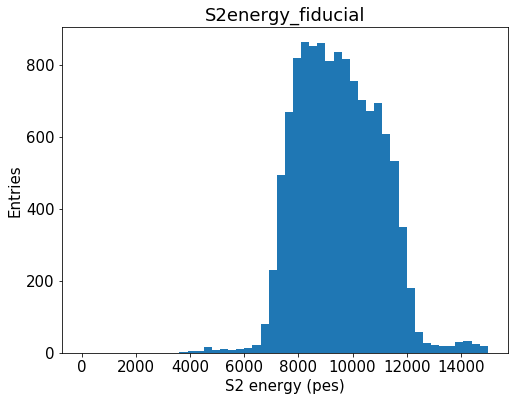

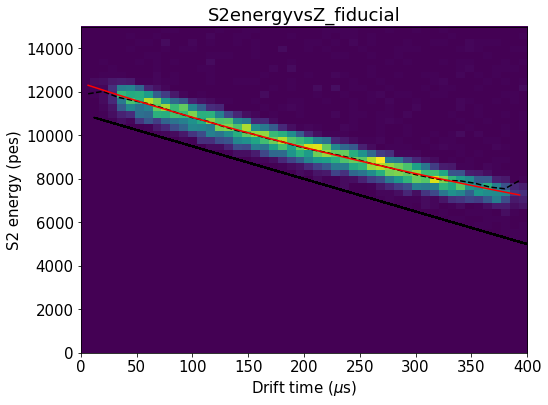

In [42]:
zrange = 0, 400
Erange = 0, 15e3

lowEfid = fid[coref.in_range(fid.S2e, 11e3 - 15*fid.Z.values, np.inf)]

hist(lowEfid.S2e, 50, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy_fiducial")

hist2d(lowEfid.Z, lowEfid.S2e, (50, 50), range=(zrange, Erange))
x, y, _ = fitf.profileX(lowEfid.Z, lowEfid.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)
plt.plot(fid.Z.values, 11e3 - 15*fid.Z.values, "k-")

f = fitf.fit(fitf.expo, x, y, (1e4, -600), fit_range=(50, 350))
plt.plot(x, f.fn(x), fitOpt)
print(f.values)
print(f.errors)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ_fiducial")

zfun  = f.fn
zmin  = np.min(x)
zcorr = lambda z: zfun(zmin)/zfun(z)

# Correction by attachment

[  5.91605625e+05   1.22601725e+04   5.04119343e+02]


/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:148: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  x, y = xdata[selection], ydata[selection]
/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:152: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  maxval = x_out[i+1])]


[  1.15887170e+04  -3.53564690e+10]


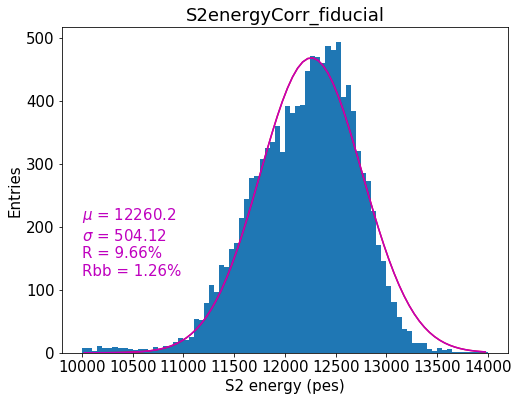

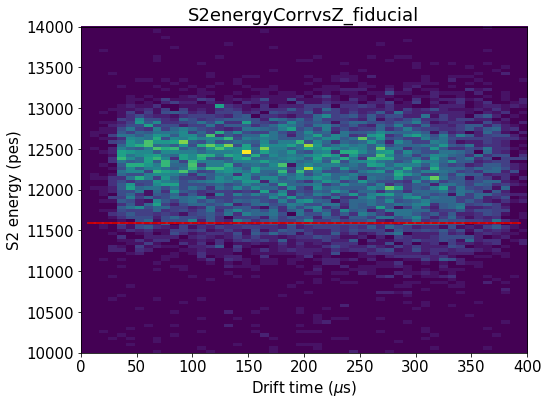

In [47]:
zrange = 0, 400
Erange = 10e3, 14e3

E = fid.S2e.values * zcorr(fid.Z.values)

y, x, _ = hist(E, 80, range=Erange)

x    = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss  (x, *args[ :3])
seed = 1e3, 12000, 100
low  =  10, 11000,  50
upp  = 1e8, 13000, 900
f    = fitf.fit(fun, x, y, seed, fit_range=(5000, 15000), bounds=(low, upp))
print(f.values)


plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values),  KrOpt)
plt.text(Erange[0], 1*max(y)/4, gausstext(f.values, 41.5), color=KrOpt)

labels("S2 energy (pes)", "Entries")
save("S2energyCorr_fiducial")

hist2d(fid.Z, E, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(fid.Z, E, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

f = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.plot(x, f.fn(x), fitOpt)

print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyCorrvsZ_fiducial")

# Tracking

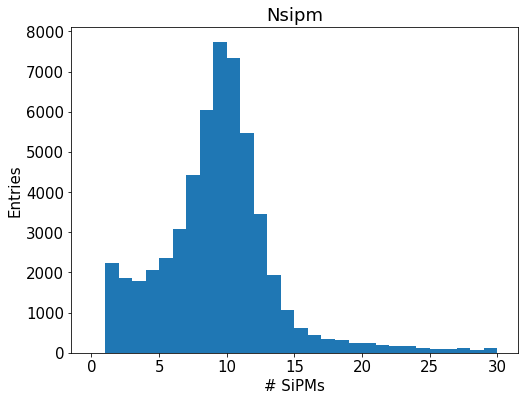

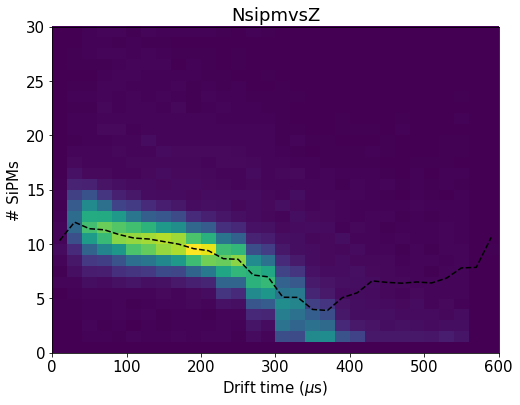

In [48]:
nrange = 0, 30
zrange = 0, 600

hist(full.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")
save("Nsipm")

hist2d(full.Z, full.Nsipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(full.Z, full.Nsipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "# SiPMs")
save("NsipmvsZ")


# XR distribution

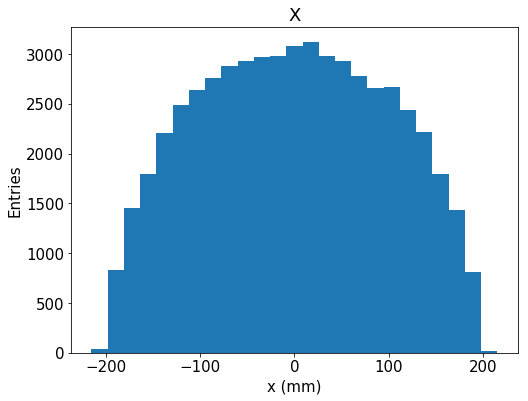

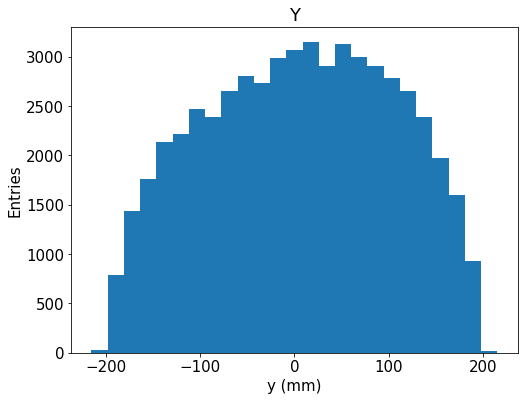

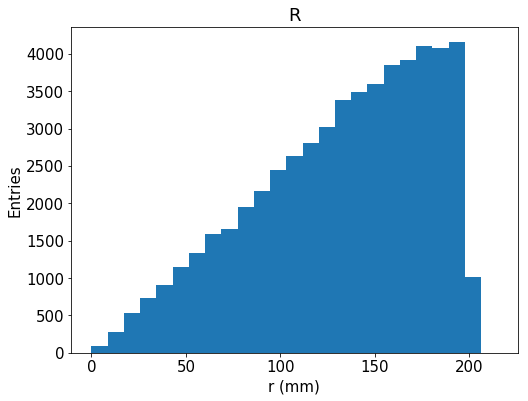

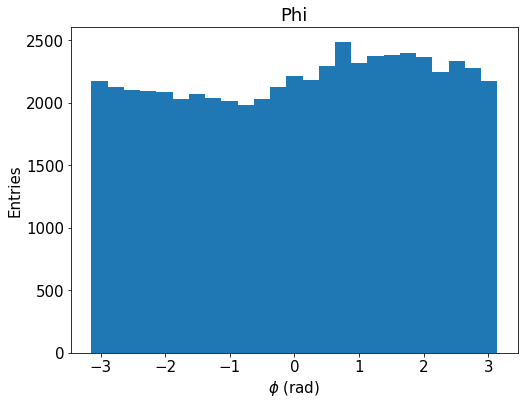

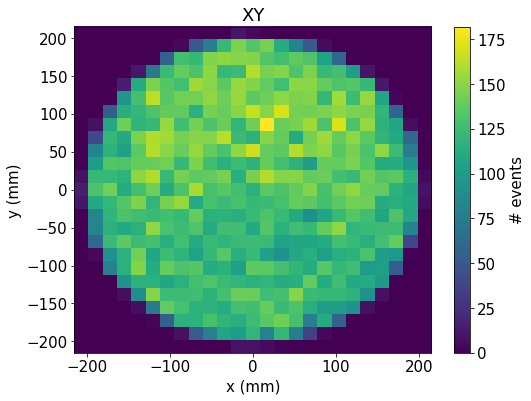

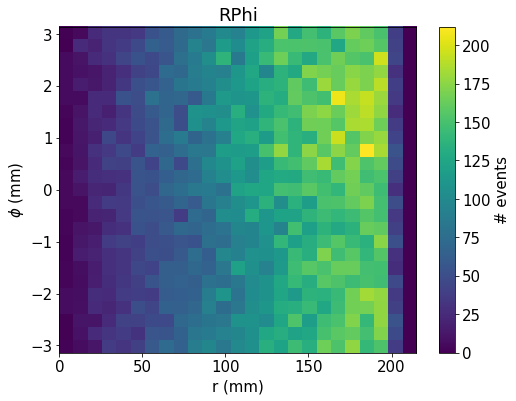

In [49]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hist(full.X, 25, range=xrange)
labels("x (mm)", "Entries")
save("X")

hist(full.Y, 25, range=yrange)
labels("y (mm)", "Entries")
save("Y")

hist(full.R, 25, range=rrange)
labels("r (mm)", "Entries")
save("R")

hist(full.Phi, 25, range=prange)
labels("$\phi$ (rad)", "Entries")
save("Phi")

nevts, xs, ys, _ = \
hist2d(full.X, full.Y, (25, 25), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")
save("XY")

hist2d(full.R, full.Phi, (25, 25), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

# Tracking charge

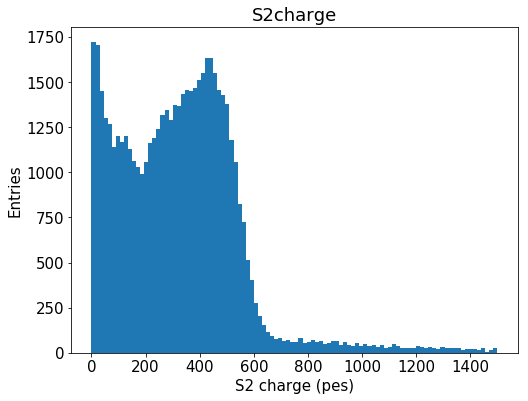

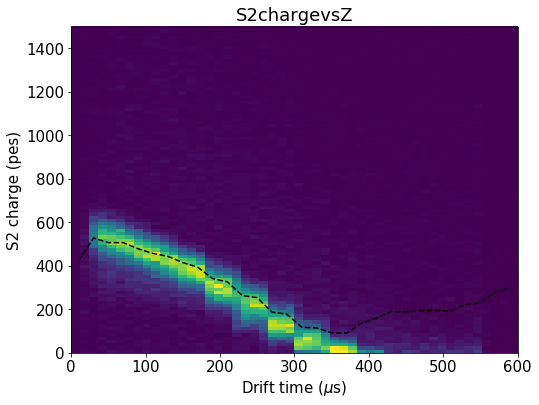

In [50]:
zrange = 0,  600
Qrange = 0, 1500

hist(full.S2q, 100, range=Qrange)
labels("S2 charge (pes)", "Entries")
save("S2charge")

hist2d(full.Z, full.S2q, (50, 100), range=(zrange, Qrange))
x, y, _ = fitf.profileX(full.Z, full.S2q, 30, xrange=zrange, yrange=Qrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 charge (pes)")
save("S2chargevsZ")

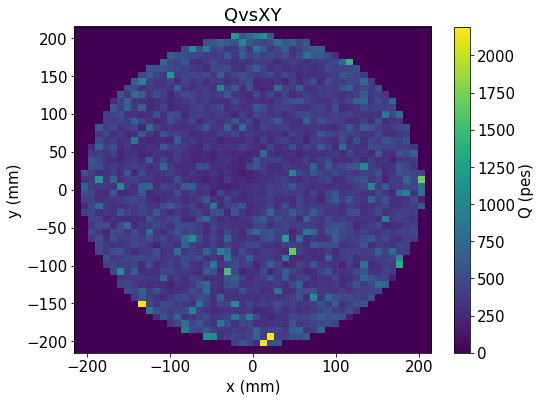

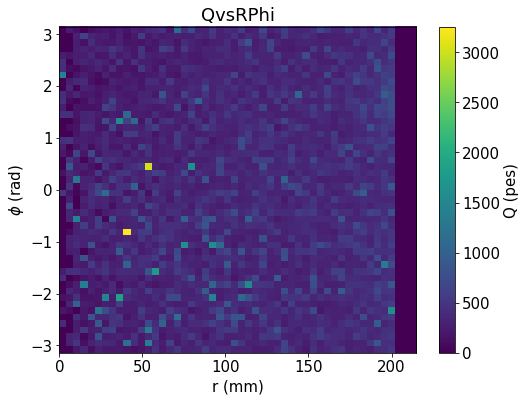

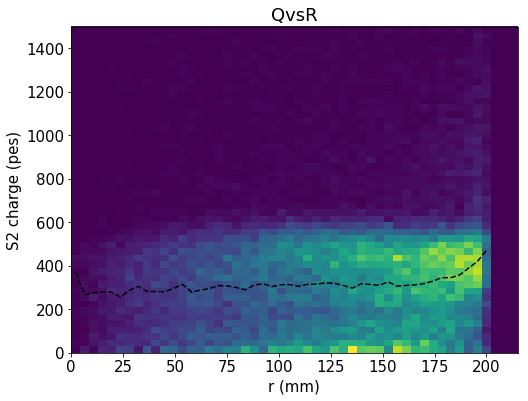

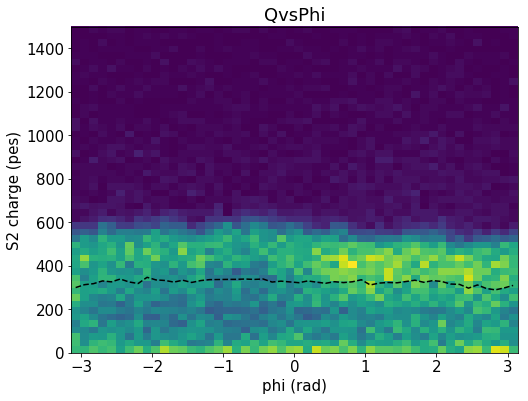

In [51]:
xrange = -215,  215
yrange = -215,  215
rrange =    0,  215
prange = - pi,   pi
Qrange =    0, 1500

_, _, cb = profile_and_scatter(full.X, full.Y, full.S2q, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("Q (pes)")
labels("x (mm)", "y (mm)")
save("QvsXY")

_, _, cb = profile_and_scatter(full.R, full.Phi, full.S2q, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("Q (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("QvsRPhi")

hist2d(full.R, full.S2q, (50, 50), range=(rrange, Qrange))
x, y, _ = fitf.profileX(full.R, full.S2q, 50, xrange=rrange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 charge (pes)")
save("QvsR")

hist2d(full.Phi, full.S2q, (50, 50), range=(prange, Qrange))
x, y, _ = fitf.profileX(full.Phi, full.S2q, 50, xrange=prange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 charge (pes)")
save("QvsPhi")


# Energy vs position

11959.1805049


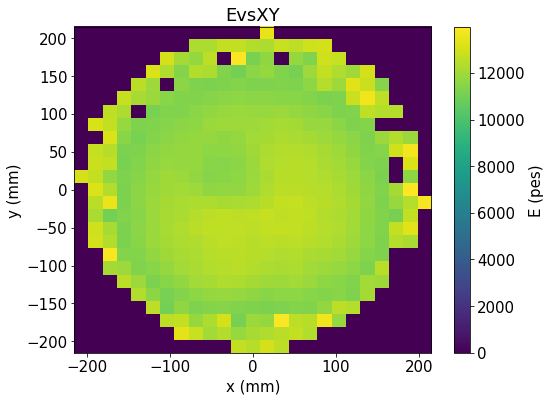

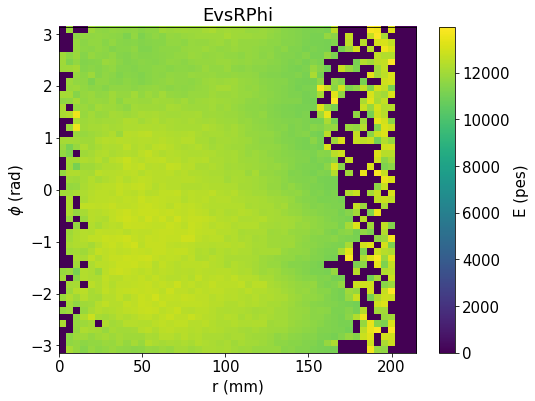

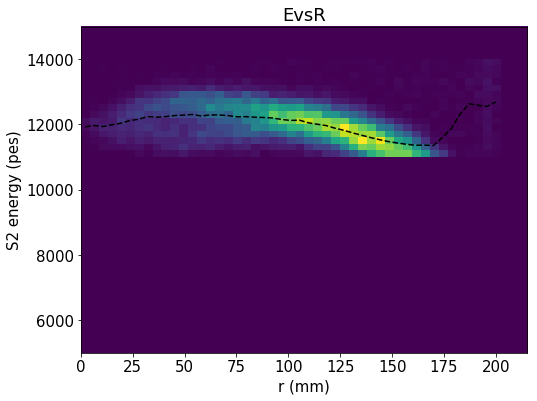

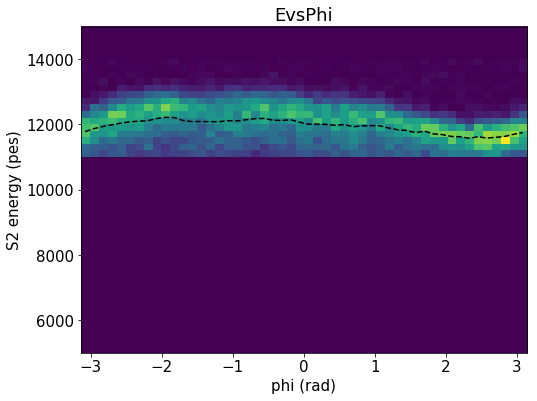

In [54]:
xrange = -215,  215
yrange = -215,  215
rrange =    0,  215
prange = - pi,   pi
Erange =  5e3, 15e3

E   = full.S2e * zcorr(full.Z)
sel = coref.in_range(E, 11e3, 14e3)
XR  = full[sel]
E   = E   [sel]

pf, _, cb = profile_and_scatter(XR.X, XR.Y, E, (25, 25), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(XR.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])


# Correction by attachment and position

[  1.81317771e+06   1.19217221e+04   2.99386998e+02]


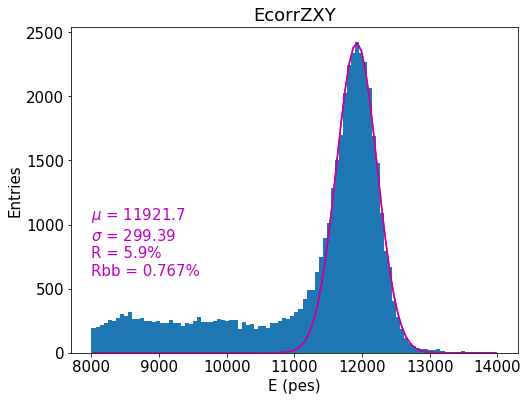

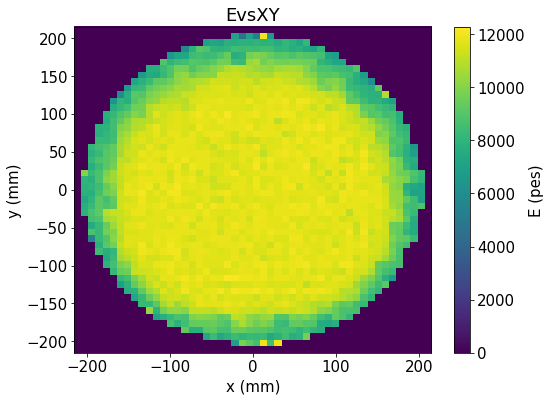

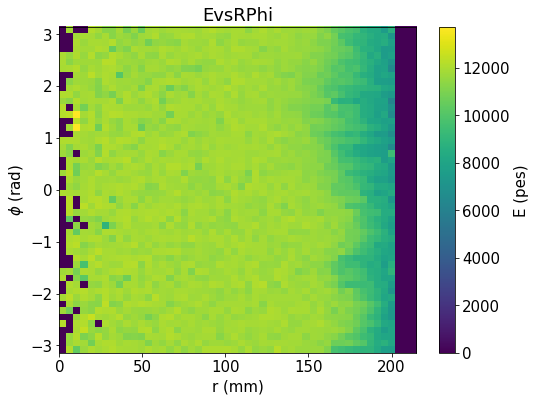

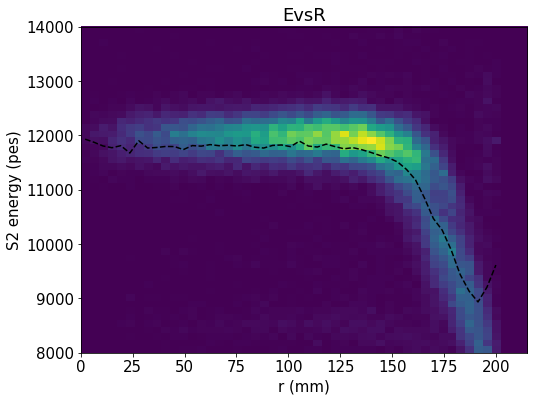

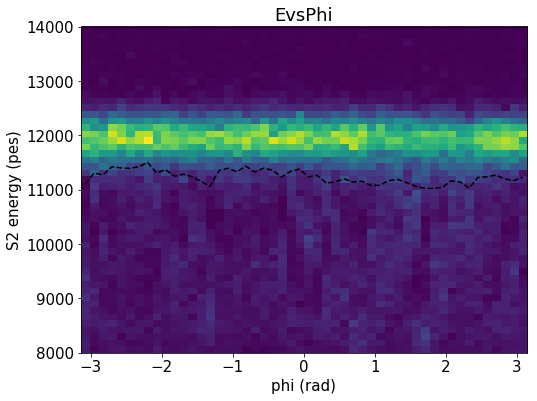

In [59]:
xrange = -215,  215
yrange = -215,  215
rrange =    0,  215
prange = - pi,   pi
Erange =  8e3, 14e3

sel = coref.in_range(full.S2e * zcorr(full.Z), 0, 14e3)
XR  = full[sel]

E  = XR.S2e * zcorr(XR.Z) * xycorr(XR.X.values, XR.Y.values)
XR = full[sel]
E  = E   [sel]

y, x, _ = hist(E, 100, Erange)
x    = x[:-1] + np.diff(x) * 0.5

fun  = lambda x, *args: fitf.gauss  (x, *args[ :3])
seed = 1e3, 12000, 100
low  =  10, 11000,  50
upp  = 1e8, 13000, 900
f    = fitf.fit(fun, x, y, seed, fit_range=(11500, 13000), bounds=(low, upp))
print(f.values)


plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values),  KrOpt)
plt.text(Erange[0], 1*max(y)/4, gausstext(f.values, 41.5), color=KrOpt)


labels("E (pes)", "Entries")
save("EcorrZXY")

_, _, cb = profile_and_scatter(XR.X, XR.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(XR.R, XR.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(XR.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")


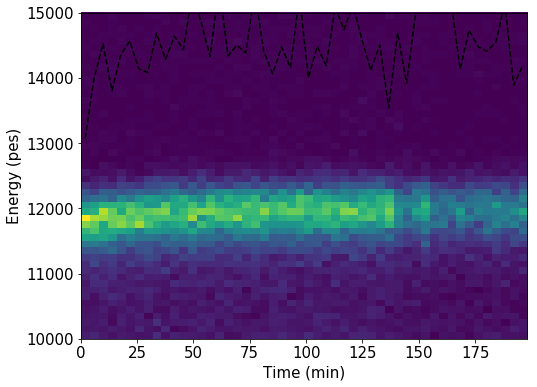

In [62]:
E = full.S2e * zcorr(full.Z) * xycorr(full.X.values, full.Y.values)
T = (full.time - np.min(full.time))/60

Erange = 10e3, 15e3
Trange = 0, np.max(T)

hist2d(T, E, (50, 50), range=(Trange, Erange))

x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")

def get_timecorr(T, E):
    eref = np.max(E)
    def timecorr(t):
        dt = np.abs(t[:, np.newaxis]-T)
        return eref / E[np.apply_along_axis(np.argmin, 1, dt)]
    return timecorr
tcorr = get_timecorr(x, y)